# Notebook for preparing and saving GraphTheoryProp graphs

In [1]:
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


/home/psoga/.virtualenvs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download Planarity dataset
Actual source 

In [2]:
# if not os.path.isfile('multitask_dataset.pkl'):
#     print('downloading..')
#     !curl https://www.dropbox.com/s/zdevjruk7k6yuqc/multitask_dataset.pkl?dl=1 -o multitask_dataset.pkl -J -L -k
# else:
#     print('File already downloaded')
    

# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/home/psoga/Documents/projects/benchmarking-gnns


In [4]:
import pickle

%load_ext autoreload
%autoreload 2

from data.planarity import PlanarityDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.planarity import PlanarityDataset


Using backend: pytorch


In [5]:
DATASET_NAME = 'Planarity'
dataset = PlanarityDatasetDGL(DATASET_NAME) 

[(Graph(num_nodes=27, num_edges=66,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([1])), (Graph(num_nodes=27, num_edges=58,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0])), (Graph(num_nodes=39, num_edges=104,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([1])), (Graph(num_nodes=39, num_edges=150,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0])), (Graph(num_nodes=37, num_edges=86,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([1])), (Graph(num_nodes=37, num_edges=134,
      

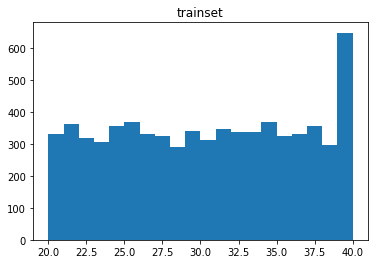

min/max : 20 40


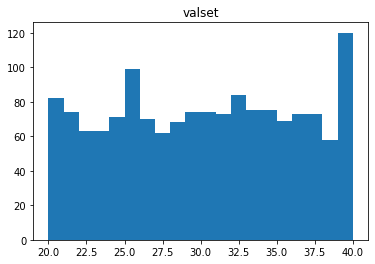

min/max : 20 40


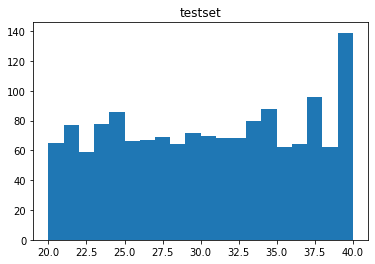

min/max : 20 40


In [6]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [7]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


7000
1500
1500
(Graph(num_nodes=39, num_edges=150,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0]))
(Graph(num_nodes=32, num_edges=88,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0]))
(Graph(num_nodes=37, num_edges=114,
      ndata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float32)}), tensor([0]))


In [8]:
start = time.time()
with open('data/planarity/Planarity'+'.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
print('Time (sec):',time.time() - start)


Time (sec): 6.372478723526001


# Test load function

In [9]:
DATASET_NAME = 'Planarity'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset Planarity...
train, test, val sizes : 7000 1500 1500
[I] Finished loading.
[I] Data load time: 5.9939s


In [10]:
batch_size = 10
collate = PlanarityDataset.collate
print(PlanarityDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.planarity.PlanarityDataset'>
